In [3]:
import pandas as pd
import mplcyberpunk
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.style.use("cyberpunk")

In [6]:
table = pd.read_csv("./data/report_20250201_135136.csv", sep=";")
table

,PAPEL,SEGMENTO,COTACAO,FFO_YIELD,DIVIDEND_YIELD,P_VP,VALOR_DE_MERCADO,LIQUIDEZ,QTD_DE_IMOVEIS,PRECO_DO_M2,ALUGUEL_POR_M2,CAP_RATE,VACANCIA_MEDIA
0,AAZQ11,Títulos e Val. Mob.,6.79,0.2110,0.1879,0.79,163213000.0,643927.0,0,0.00,0.00,0.0000,0.0000
1,ABCP11,Shoppings,74.52,0.0957,0.0925,0.69,350921000.0,56830.0,1,4905.33,571.37,0.1165,0.1182
2,AEFI11,Outros,174.90,0.0904,0.0000,1.56,411893000.0,0.0,7,0.00,398.61,0.0000,0.0000
3,AFCR11,Híbrido,103.15,0.1093,0.0000,1.09,498867000.0,0.0,0,0.00,0.00,0.0000,0.0000
4,AFHI11,Títulos e Val. Mob.,87.92,0.1069,0.1276,0.96,400530000.0,1237150.0,0,0.00,0.00,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,YUFI11,Residencial,59.52,0.0498,0.0487,0.56,29322500.0,19.0,40,1437.34,224.64,0.1563,0.0000
494,ZAGH11,Híbrido,10.70,0.0289,0.0579,1.14,95140800.0,3309.0,0,0.00,0.00,0.0000,0.0000
495,ZAVC11,Títulos e Val. Mob.,9.50,0.0712,0.1163,0.96,29424800.0,42.0,0,0.00,0.00,0.0000,0.0000
496,ZAVI11,Híbrido,86.25,0.1759,0.1764,0.65,101199000.0,507495.0,10,1364.79,207.27,0.1519,0.0068


In [31]:
table['DIVIDEND_YIELD'].describe()

count     498.000000
mean       13.274347
std       293.622159
min         0.000000
25%         0.013650
50%         0.099000
75%         0.143250
max      6552.560000
Name: DIVIDEND_YIELD, dtype: float64

In [34]:
table[table['DIVIDEND_YIELD'] == table['DIVIDEND_YIELD'].max()]

,PAPEL,SEGMENTO,COTACAO,FFO_YIELD,DIVIDEND_YIELD,P_VP,VALOR_DE_MERCADO,LIQUIDEZ,QTD_DE_IMOVEIS,PRECO_DO_M2,ALUGUEL_POR_M2,CAP_RATE,VACANCIA_MEDIA
441,TSNC11,Híbrido,82.1,-0.0748,6552.56,1.03,89224600.0,156.0,1,7082.67,72.5,0.0102,1.0


In [36]:
table.drop(index=441, inplace=True)

In [50]:
table_unoutlier = table[table['DIVIDEND_YIELD'] <= 0.143250]
table_unoutlier

,PAPEL,SEGMENTO,COTACAO,FFO_YIELD,DIVIDEND_YIELD,P_VP,VALOR_DE_MERCADO,LIQUIDEZ,QTD_DE_IMOVEIS,PRECO_DO_M2,ALUGUEL_POR_M2,CAP_RATE,VACANCIA_MEDIA
1,ABCP11,Shoppings,74.52,0.0957,0.0925,0.69,3.509210e+08,56830.0,1,4905.33,571.37,0.1165,0.1182
2,AEFI11,Outros,174.90,0.0904,0.0000,1.56,4.118930e+08,0.0,7,0.00,398.61,0.0000,0.0000
3,AFCR11,Híbrido,103.15,0.1093,0.0000,1.09,4.988670e+08,0.0,0,0.00,0.00,0.0000,0.0000
4,AFHI11,Títulos e Val. Mob.,87.92,0.1069,0.1276,0.96,4.005300e+08,1237150.0,0,0.00,0.00,0.0000,0.0000
5,AFOF11,Títulos e Val. Mob.,91.60,0.0086,0.0000,12.23,1.390540e+09,0.0,0,0.00,0.00,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,YCHY11,Híbrido,1000.00,-0.0536,0.0000,10.01,4.235040e+09,0.0,11,17127.60,130.14,0.0076,0.0000
493,YUFI11,Residencial,59.52,0.0498,0.0487,0.56,2.932250e+07,19.0,40,1437.34,224.64,0.1563,0.0000
494,ZAGH11,Híbrido,10.70,0.0289,0.0579,1.14,9.514080e+07,3309.0,0,0.00,0.00,0.0000,0.0000
495,ZAVC11,Títulos e Val. Mob.,9.50,0.0712,0.1163,0.96,2.942480e+07,42.0,0,0.00,0.00,0.0000,0.0000


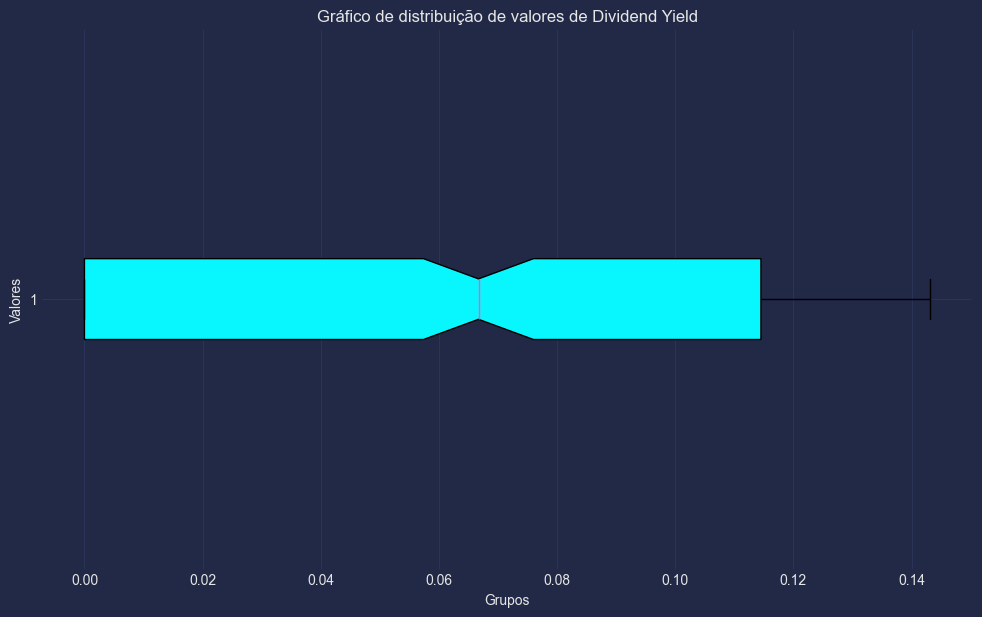

In [51]:

plt.figure(figsize=(12, 7))
plt.boxplot(table_unoutlier['DIVIDEND_YIELD'], patch_artist=True, notch=True, vert=False)
# Adicionar efeitos cyberpunk
# mplcyberpunk.add_glow_effects()
# plt.figure(figsize=(10, 5))
# Configurar título e rótulos
plt.title("Gráfico de distribuição de valores de Dividend Yield")
plt.xlabel("Grupos")
plt.ylabel("Valores")

# Mostrar gráfico
plt.show()

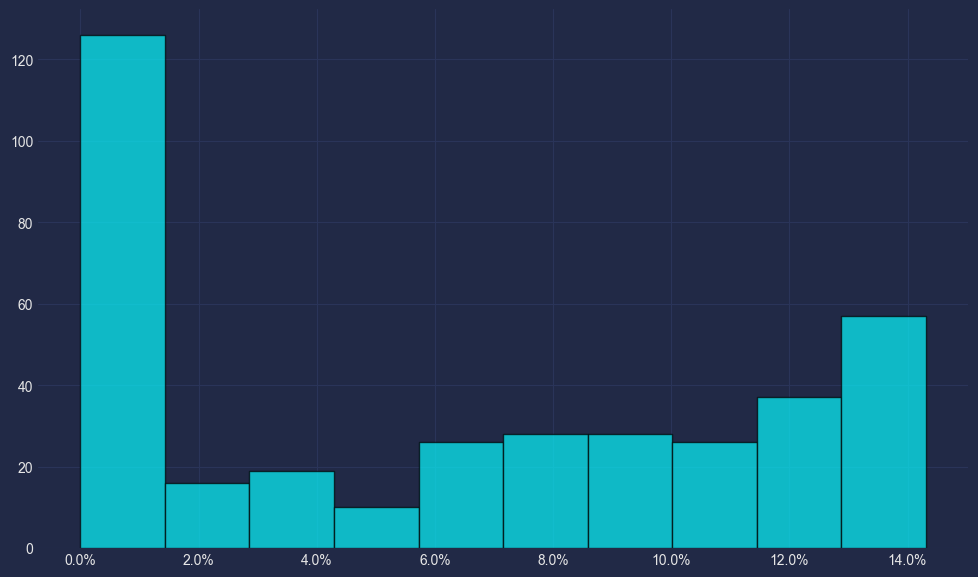

In [62]:
plt.figure(figsize=(12, 7))
plt.hist(table_unoutlier['DIVIDEND_YIELD'], bins=10,  edgecolor='black', alpha=0.7)
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [27]:
### Média de Dividend Yield por Segmento de FII


table.groupby(['SEGMENTO']).mean(numeric_only=True)[['DIVIDEND_YIELD']]

,DIVIDEND_YIELD
SEGMENTO,
Hospital,0.104925
Hotel,0.084200
Híbrido,52.539214
Lajes Corporativas,0.107496
Logística,0.078706
Outros,0.126131
Residencial,0.083682
Shoppings,0.073692
Títulos e Val. Mob.,0.133847


/tmp/ipykernel_373420/1920534149.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, patch_artist=True, notch=True, vert=False, labels=df.columns)


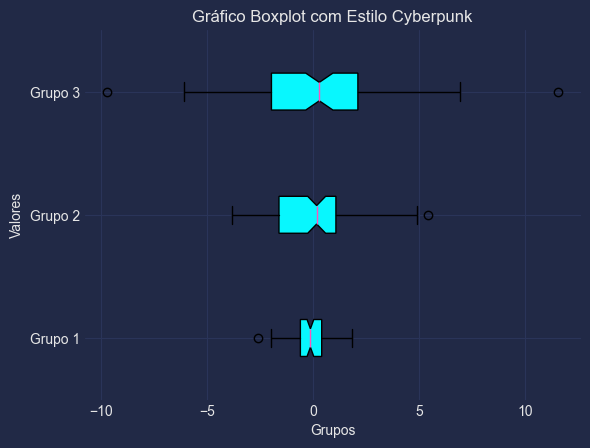

In [30]:
import matplotlib.pyplot as plt
import mplcyberpunk
import pandas as pd
import numpy as np

# Gerar dados de exemplo
np.random.seed(42)
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# Criar DataFrame
df = pd.DataFrame(data).T
df.columns = ['Grupo 1', 'Grupo 2', 'Grupo 3']

# Criar gráfico boxplot com estilo cyberpunk
plt.style.use("cyberpunk")



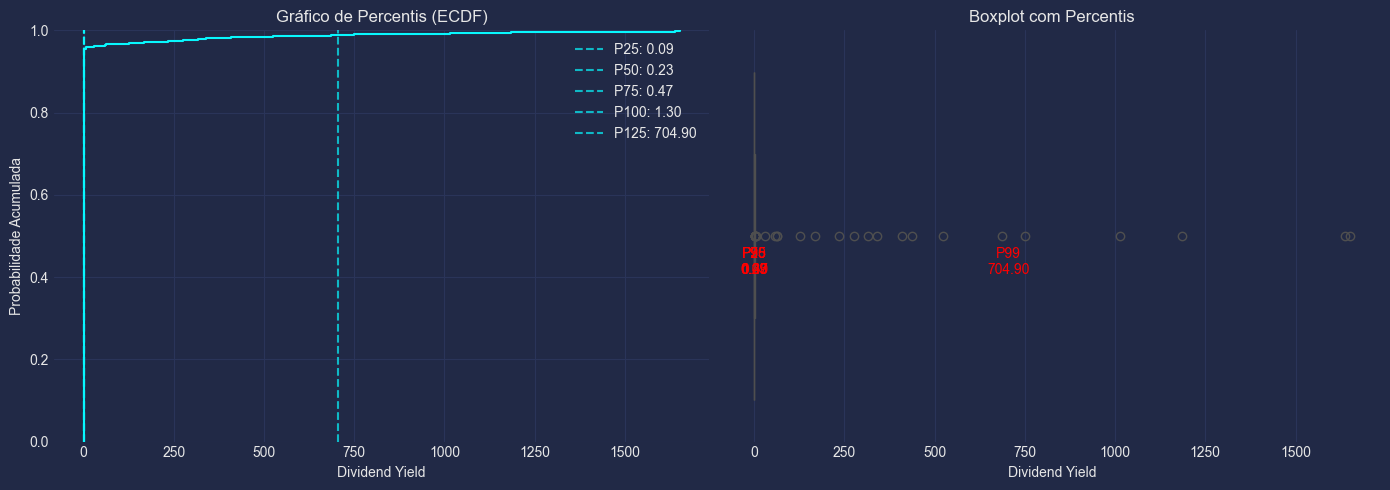

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulando dados
np.random.seed(42)
dy_normal = np.random.exponential(scale=0.3, size=450)  # Concentração entre 0 e 1
dy_outliers = np.random.exponential(scale=500, size=21)  # Outliers extremos
dy_data = np.concatenate([dy_normal, dy_outliers])

# Calculando percentis
percentiles = np.percentile(dy_data, [25, 50, 75, 95, 99])
p25, p50, p75, p95, p99 = percentiles

# Criando uma figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico ECDF (Função de Distribuição Empírica)
sns.ecdfplot(dy_data, ax=axes[0])
axes[0].set_title("Gráfico de Percentis (ECDF)")
axes[0].set_xlabel("Dividend Yield")
axes[0].set_ylabel("Probabilidade Acumulada")

# Adicionando linhas de referência para os percentis principais
for p in percentiles:
    axes[0].axvline(p, linestyle="--", alpha=0.7, label=f"P{int(np.where(percentiles==p)[0][0]*25+25)}: {p:.2f}")

axes[0].legend()

# Boxplot com anotações dos percentis
sns.boxplot(x=dy_data, ax=axes[1])
axes[1].set_title("Boxplot com Percentis")
axes[1].set_xlabel("Dividend Yield")

# Adicionando texto dos percentis no boxplot
for p, label in zip(percentiles, ["P25", "P50", "P75", "P95", "P99"]):
    axes[1].text(p, 0.1, f"{label}\n{p:.2f}", ha="center", va="bottom", color="red")

plt.tight_layout()
plt.show()
